# Keenan 0706022310011

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [65]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dataset tersebut merupakan DataFrame dengan 200 baris dan 5 kolom, terdiri dari CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1-100). Semua data lengkap tanpa nilai kosong. Empat kolom bertipe numerik (int64) dan satu kolom, Gender, bertipe kategorikal (object). Ukuran dataset kecil, sekitar 7,9 KB, dan berisi informasi pelanggan yang dapat digunakan untuk analisis seperti segmentasi atau klastering.

In [67]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Berdasarkan hasil statistik deskriptif, dataset terdiri dari 200 pelanggan dengan rata-rata usia 38,85 tahun dan standar deviasi 13,97, menunjukkan bahwa usia pelanggan cukup bervariasi antara 18 hingga 70 tahun. Pendapatan tahunan rata-rata berada di kisaran 60,56 ribu dolar, dengan nilai minimum 15 ribu dan maksimum 137 ribu dolar, menandakan adanya perbedaan tingkat ekonomi yang cukup lebar di antara pelanggan. Sementara itu, skor pengeluaran pelanggan memiliki rata-rata 50,2 dengan standar deviasi 25,82, yang berarti perilaku belanja pelanggan cukup beragam, mulai dari yang jarang berbelanja (skor mendekati 1) hingga yang sangat aktif (skor mendekati 99). Secara keseluruhan, data ini menunjukkan variasi yang cukup tinggi dalam hal usia, pendapatan, dan kebiasaan belanja, yang dapat menjadi dasar untuk melakukan segmentasi pelanggan lebih lanjut.

In [68]:
# rename the Income($)  column
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


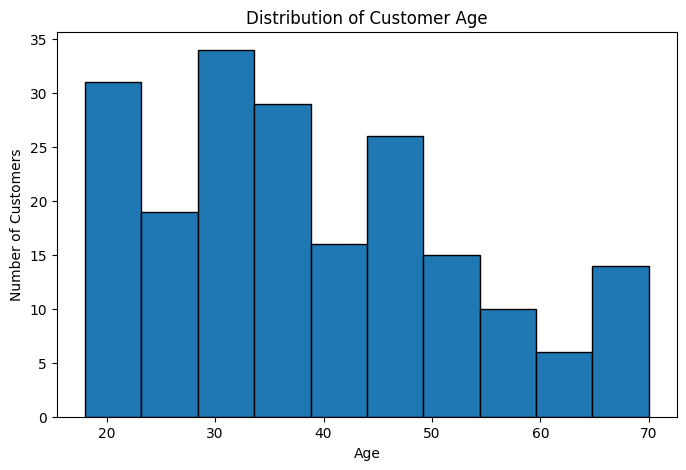

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

Berdasarkan histogram distribusi usia pelanggan, terlihat bahwa sebagian besar pelanggan berada dalam rentang usia muda hingga paruh baya. Terdapat puncak yang signifikan pada rentang usia 20-an hingga 40-an. Hal ini menunjukkan bahwa mayoritas pelanggan mal ini adalah individu dalam kelompok usia tersebut. Ada juga sejumlah pelanggan di usia yang lebih tua, meskipun jumlahnya tidak sebanyak kelompok usia yang lebih muda.

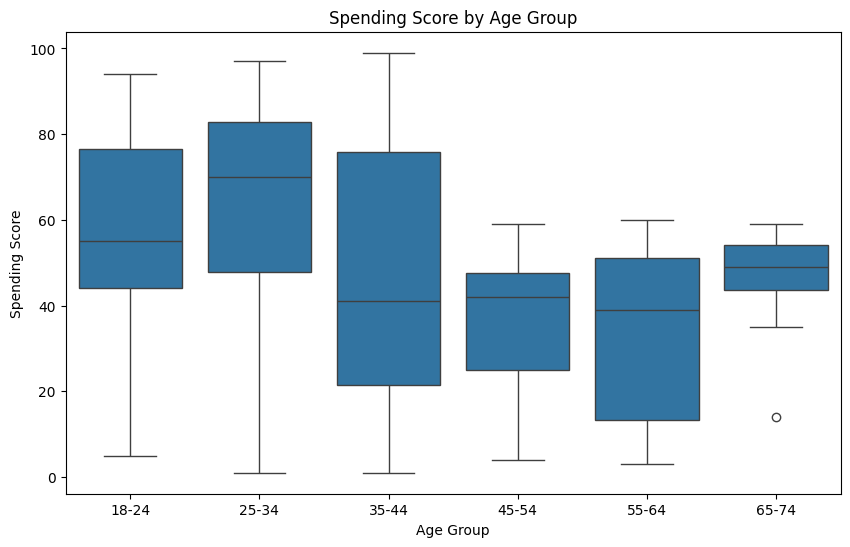

In [70]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='SpendingScore', data=df, order=labels)
plt.title('Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.show()

*   Kelompok Usia Muda (18-34 tahun): Terlihat bahwa kelompok usia ini memiliki rentang Spending Score yang cukup lebar, dengan beberapa outlier pada skor yang tinggi. Ini menunjukkan bahwa meskipun rata-rata spending score mungkin tidak yang tertinggi, ada cukup banyak pelanggan muda dengan daya belanja yang sangat tinggi.
*   Kelompok Usia Paruh Baya (35-54 tahun): Kelompok ini cenderung memiliki median Spending Score yang lebih rendah dibandingkan kelompok usia muda. Rentang Spending Score mereka juga terlihat lebih terkonsentrasi.
*   Kelompok Usia Lebih Tua (55-74 tahun): Kelompok usia ini menunjukkan Spending Score yang cenderung lebih rendah dan rentangnya lebih sempit dibandingkan kelompok usia lainnya.

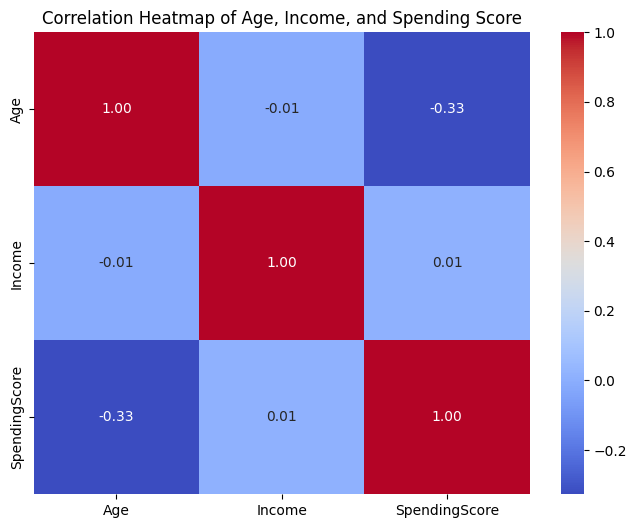

In [71]:
# Select the relevant columns
correlation_data = df[['Age', 'Income', 'SpendingScore']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Age, Income, and Spending Score')
plt.show()

*   Age dan Income: Koefisien korelasi antara Age dan Income adalah sekitar -0.012. Nilai ini sangat mendekati nol, menunjukkan bahwa hampir tidak ada korelasi linear antara usia pelanggan dan pendapatan tahunan mereka. Artinya, usia pelanggan tidak secara signifikan memengaruhi pendapatan mereka dalam dataset ini.
*   Age dan Spending Score: Koefisien korelasi antara Age dan Spending Score adalah sekitar -0.327. Ini menunjukkan adanya korelasi negatif yang lemah hingga sedang antara usia pelanggan dan skor pengeluaran mereka. Semakin tua usia pelanggan, cenderung semakin rendah skor pengeluaran mereka, meskipun hubungannya tidak terlalu kuat.
*   Income dan Spending Score: Koefisien korelasi antara Income dan Spending Score adalah sekitar 0.0099. Nilai ini juga sangat mendekati nol, menunjukkan bahwa tidak ada korelasi linear antara pendapatan tahunan dan skor pengeluaran pelanggan. Ini berarti pelanggan dengan pendapatan lebih tinggi tidak serta merta memiliki skor pengeluaran yang lebih tinggi, dan sebaliknya.

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

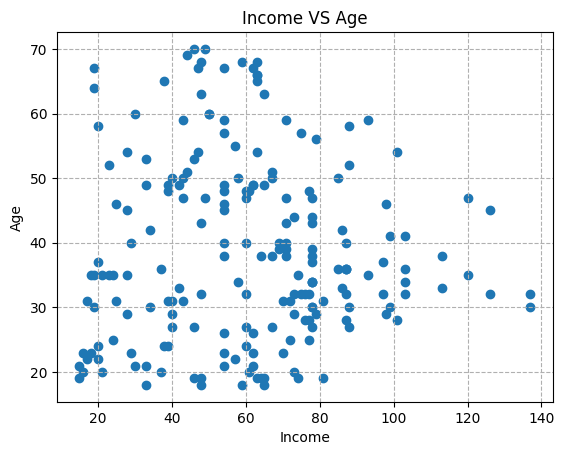

In [73]:
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

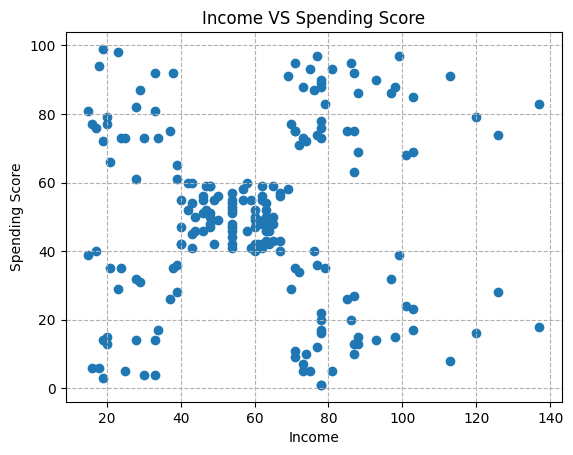

In [49]:
plt.scatter(df['Income'], df['SpendingScore'])
plt.title('Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

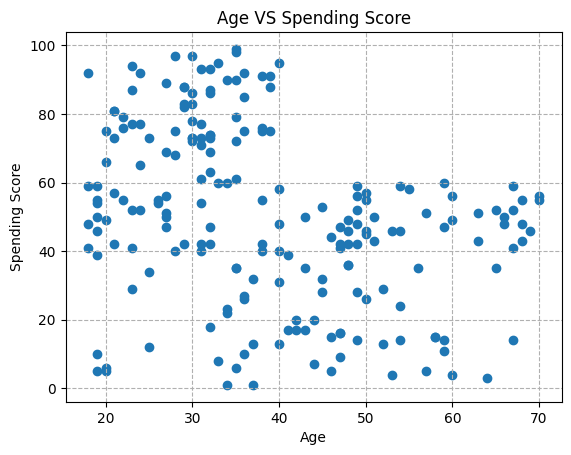

In [50]:
plt.scatter(df['Age'], df['SpendingScore'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

In [74]:
# create new dataframe that consist only annual income and spending score
df = df[['Gender', 'Age', 'Income', 'SpendingScore']]
df.head()

,Gender,Age,Income,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Data Scaling

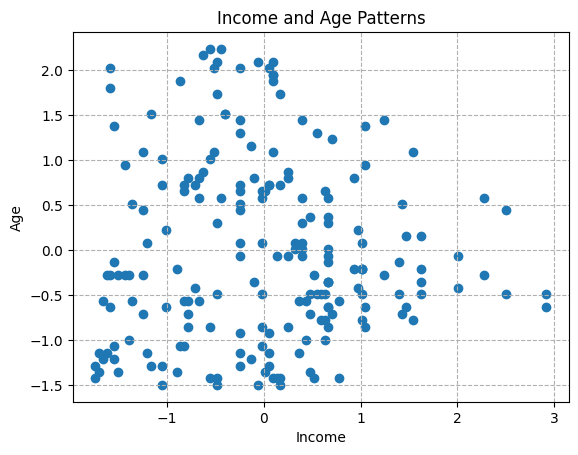

In [76]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Gender", "Age", "Income", "SpendingScore"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Age"])
plt.xlabel("Income")
plt.ylabel("Age")
plt.grid(axis='both', linestyle='--')
plt.title("Income and Age Patterns")
plt.show()

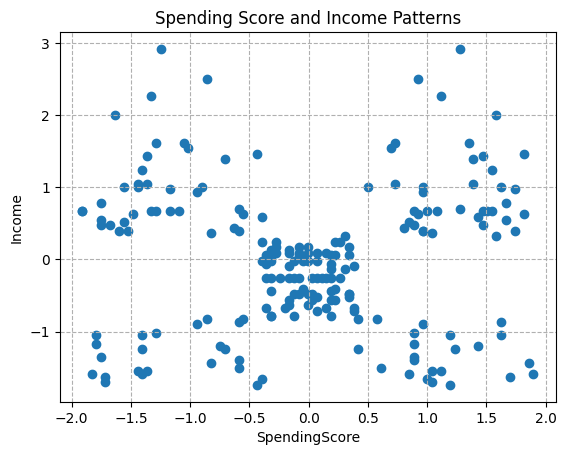

In [77]:
plt.scatter(df_sc_scaled["SpendingScore"], df_sc_scaled["Income"])
plt.xlabel("SpendingScore")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Spending Score and Income Patterns")
plt.show()

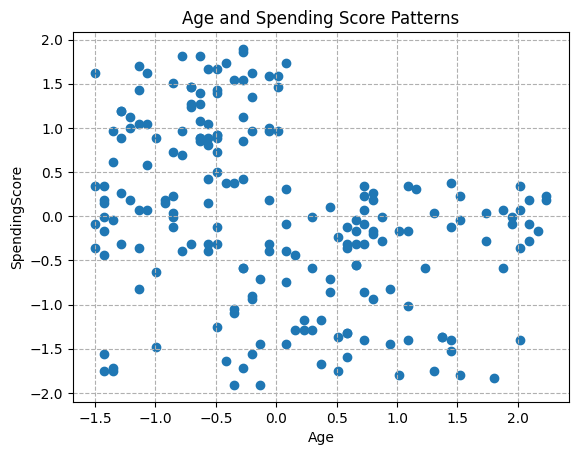

In [78]:
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["SpendingScore"])
plt.xlabel("Age")
plt.ylabel("SpendingScore")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Spending Score Patterns")
plt.show()

## K-Means Clustering

In [79]:
from sklearn.cluster import KMeans

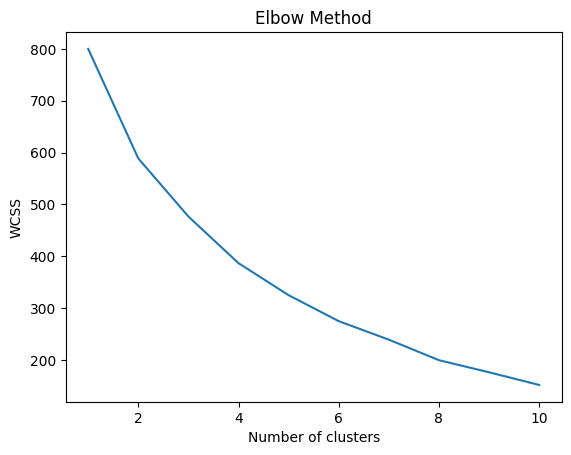

In [80]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  800.000000
1                   2  588.802677
2                   3  476.787554
3                   4  386.828426
4                   5  325.094980
5                   6  275.030671
6                   7  239.327862
7                   8  199.750461
8                   9  176.419096
9                  10  152.029834


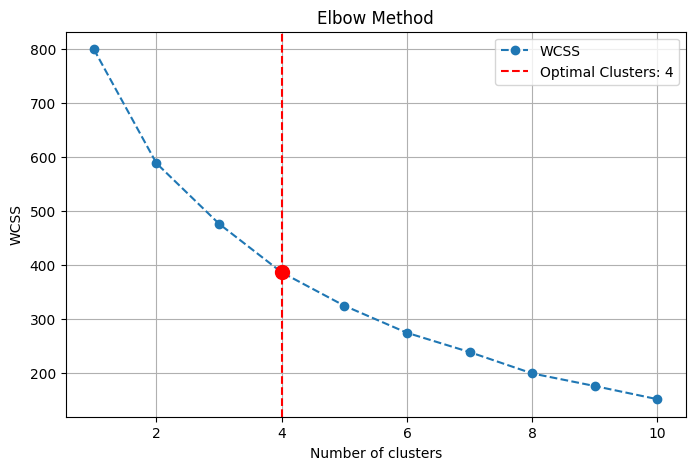

The optimal number of clusters is: 4


In [82]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [83]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Income,SpendingScore,KMeans_Cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2


/tmp/ipython-input-304132749.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


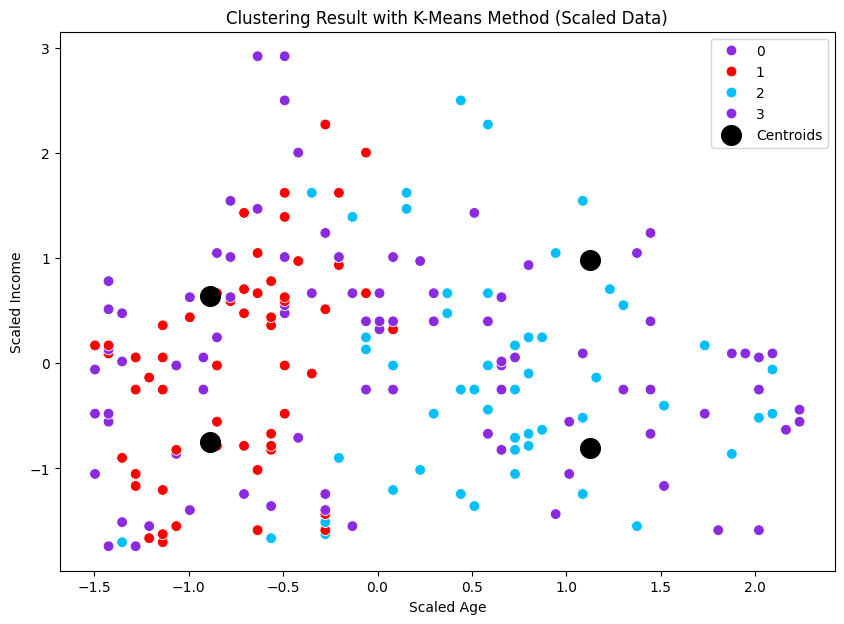

In [84]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

/tmp/ipython-input-343318484.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "SpendingScore", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


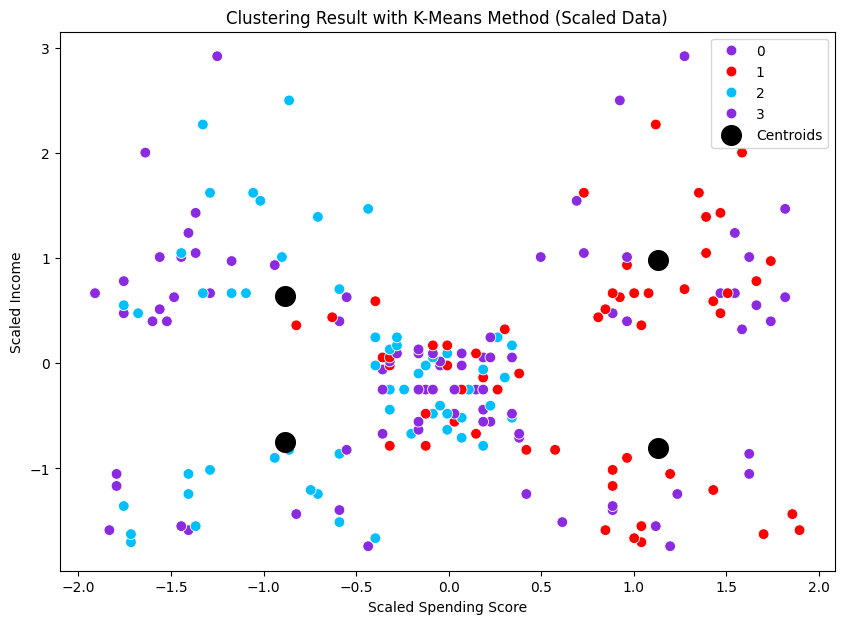

In [85]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "SpendingScore", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Spending Score")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

/tmp/ipython-input-4148311529.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


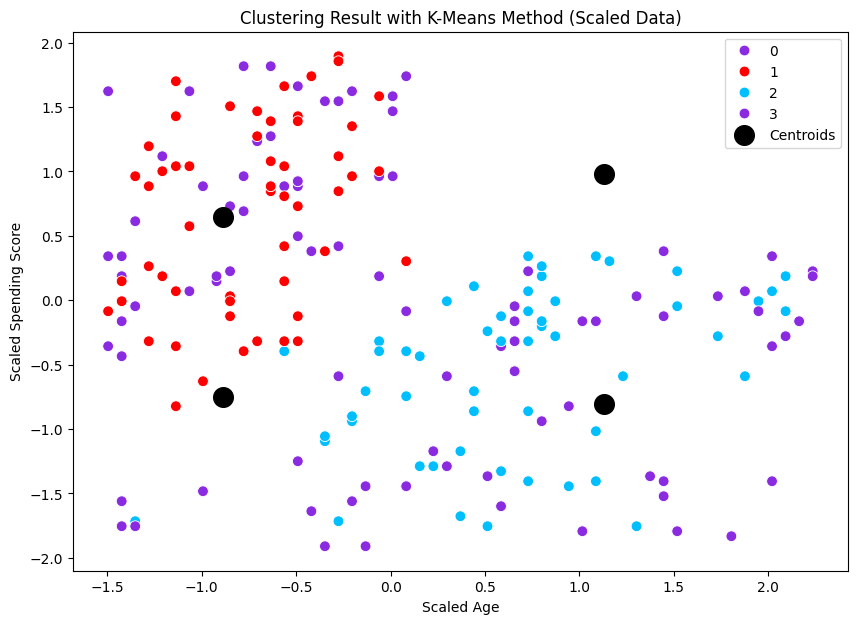

In [86]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

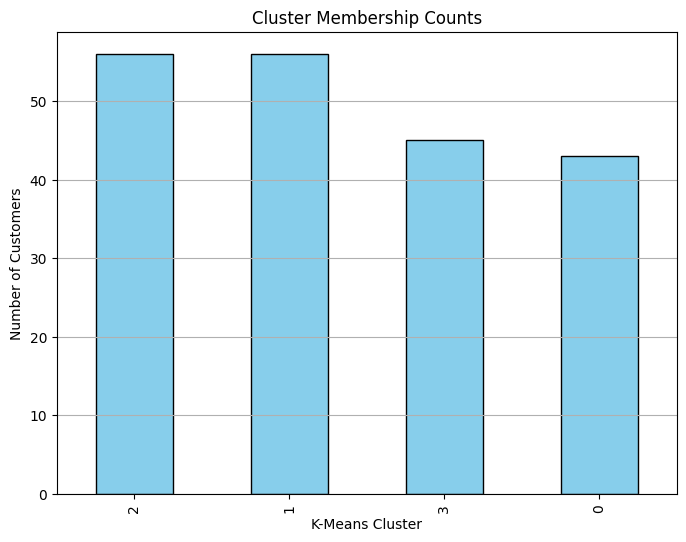

In [87]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [91]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby('KMeans_Cluster').agg({'Gender': [pd.Series.mode, 'min', 'max'],
                                            'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                            'SpendingScore': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Gender                Age             Income           \
                 mode min max       mean min max       mean min  max   
KMeans_cluster                                                         
0                   1   1   1  52.511628  33  70  59.395349  19  113   
1                   0   0   0  28.392857  18  40  60.428571  16  120   
2                   0   0   0  47.803571  20  68  58.071429  16  126   
3                   1   1   1  27.666667  18  40  64.933333  15  137   

               SpendingScore          
                        mean min max  
KMeans_cluster                        
0                  31.441860   1  60  
1                  68.178571  29  99  
2                  34.875000   5  59  
3                  64.822222   5  97

Berdasarkan cluster_summary yang kita peroleh:

* Klaster 0:

Profil: Cenderung berjenis kelamin Laki-laki (mode 1), usia rata-rata sekitar 52.5 tahun (rentang 33-70), pendapatan rata-rata sekitar 59.4 ribu dolar (rentang 19-113), dan skor pengeluaran rata-rata rendah sekitar 31.4 (rentang 1-60). Ini adalah kelompok pelanggan usia lebih tua dengan pendapatan menengah dan skor pengeluaran rendah.
Implikasi Manajerial: Kelompok ini mungkin kurang tertarik pada tren terbaru atau pembelian impulsif. Fokus pada produk atau layanan yang menawarkan nilai, keandalan, dan kenyamanan. Komunikasi pemasaran bisa menekankan pada manfaat jangka panjang, kualitas, dan layanan pelanggan yang baik. Pertimbangkan penawaran yang relevan dengan gaya hidup di usia mereka.

* Klaster 1:

Profil: Cenderung berjenis kelamin Perempuan (mode 0), usia rata-rata sekitar 28.4 tahun (rentang 18-40), pendapatan rata-rata sekitar 60.4 ribu dolar (rentang 16-120), dan skor pengeluaran rata-rata tinggi sekitar 68.2 (rentang 29-99). Ini adalah kelompok pelanggan muda, didominasi perempuan, dengan pendapatan menengah dan skor pengeluaran tinggi.
Implikasi Manajerial: Kelompok ini kemungkinan besar adalah early adopter dan responsif terhadap tren. Targetkan mereka dengan produk atau layanan yang fashionable, inovatif, dan pengalaman berbelanja yang menarik. Gunakan platform media sosial dan influencer marketing. Tawarkan program loyalitas atau keanggotaan yang memberikan keuntungan eksklusif.

* Klaster 2:

Profil: Cenderung berjenis kelamin Perempuan (mode 0), usia rata-rata sekitar 47.8 tahun (rentang 20-68), pendapatan rata-rata sekitar 58.1 ribu dolar (rentang 16-126), dan skor pengeluaran rata-rata rendah sekitar 34.9 (rentang 5-59). Ini adalah kelompok pelanggan usia paruh baya hingga lebih tua, didominasi perempuan, dengan pendapatan menengah dan skor pengeluaran rendah.
Implikasi Manajerial: Mirip dengan Klaster 0 dalam hal skor pengeluaran rendah, kelompok ini mungkin lebih berhati-hati dalam berbelanja. Tawarkan produk atau layanan yang esensial, praktis, dan menawarkan nilai terbaik untuk uang. Komunikasi pemasaran bisa menekankan pada fungsionalitas, daya tahan, dan promosi hemat biaya.

* Klaster 3:

Profil: Cenderung berjenis kelamin Laki-laki (mode 1), usia rata-rata sekitar 27.7 tahun (rentang 18-40), pendapatan rata-rata sekitar 64.9 ribu dolar (rentang 15-137), dan skor pengeluaran rata-rata tinggi sekitar 64.8 (rentang 5-97). Ini adalah kelompok pelanggan muda, didominasi laki-laki, dengan pendapatan menengah hingga tinggi dan skor pengeluaran tinggi.
Implikasi Manajerial: Mirip dengan Klaster 1 dalam hal skor pengeluaran tinggi dan usia muda. Targetkan mereka dengan produk atau layanan yang menarik, berorientasi pada pengalaman, dan mengikuti tren. Gunakan saluran pemasaran digital. Pertimbangkan penawaran yang terkait dengan hobi atau minat yang umum di kalangan pria muda.